In [1]:
import pandas as pd

# CSVデータの読み込み
data = pd.read_csv("./data-shin/merged_data_final.csv")

# DataFrameの作成
df = pd.DataFrame(data)

/tmp/ipykernel_16539/493327055.py:4: DtypeWarning: Columns (1,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data-shin/merged_data_final.csv")


In [2]:
# Horse Weightを変形
df[['Weight', 'Weight Change']] = df['Horse Weight'].str.extract(r'(\d+)\s*\(\s*([+-]?\d+)\s*\)')
df['Weight'] = df['Weight'].fillna(0)
df['Weight'] = df['Weight'].astype(int)
df['Weight Change'] = df['Weight Change'].fillna(0)
df['Weight Change'] = df['Weight Change'].astype(int)
df.drop(columns=['Horse Weight'], inplace=True)

In [3]:
# 「Sex/Age」列を「Sex」と「Age」に分ける
df['Sex'] = df['Sex/Age'].str[0] 
df = df[df['Sex'].str.contains('牝|牡|セ')]

df['Age'] = df['Sex/Age'].str[1].astype(int)
df['Age'] = pd.cut(df['Age'], bins=[0, 4, 100], labels=['Under4', 'Above4'])

df.drop(columns=['Sex/Age'], inplace=True)

In [4]:
def convert_to_second(time_str):
    # time_strが文字列の場合にのみ処理
    if isinstance(time_str, str):
        try:
            # "分:秒" の形式で分と秒を分解して、秒に変換
            minutes, seconds = map(float, time_str.split(':'))
            return minutes * 60 + seconds
        except ValueError:
            # 時間のフォーマットが間違っている場合はNoneを返すか、0秒などを返す
            return 0
    # 文字列でない場合（NaNなど）はそのまま返す
    return time_str  
df['Time'] = df['Time'].apply(convert_to_second)

In [5]:
# Distanceを分離
df['Ground'] = df['Distance'].str[0]
df['Distance'] = df['Distance'].str[1:]
# Ground, Condition, Weatherをダミー変数に変換
dummy = pd.get_dummies(df[['Ground', 'Condition', 'Weather','Sex','Age']])

# データフレームを結合し、要らないデータを破棄
df = pd.concat([df, dummy], axis=1)
df.drop(columns=['Ground', 'Condition', 'Weather','Sex','Age'], inplace=True)

# first_chars = df['Condition'].dropna().apply(lambda x: str(x)[0])  # NaNを除外し、先頭文字を取得
# unique_first_chars = first_chars.unique()  # ユニークな文字を取得

# # 結果を表示
# print("0インデックス目のユニークな文字:", list(unique_first_chars))

In [6]:
# Rankにある"(降)"を除去
df['Rank'] = df['Rank'].astype(str).str.replace(r'[()降]', '', regex = True)
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce').astype('Int64') # errors='coerce'でエラーをNaNに変換

df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce').astype('Float64') # errors='coerce'でエラーをNaNに変換

In [7]:
df1 = df[["Rank","Kinryou","Time","Nobori","Tansyou","Ninki","Shoukin","Race Number","Distance","Weight","Weight Change"]]
print('データ型の確認（型変換前）\n{}'.format(df1.dtypes))

データ型の確認（型変換前）
Rank               Int64
Kinryou          float64
Time             float64
Nobori           float64
Tansyou           object
Ninki            float64
Shoukin           object
Race Number      float64
Distance         Float64
Weight             int64
Weight Change      int64
dtype: object


In [8]:
df.to_csv('format_data.csv', index=False)

In [9]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df1 = df[["Rank","Kinryou","Time","Nobori","Ninki","Race Number","Distance","Weight","Weight Change","Ground_ダ","Ground_芝","Ground_障","Condition_不","Condition_稍","Condition_良","Condition_重","Weather_小雨","Weather_小雪","Weather_晴","Weather_曇","Weather_雨","Weather_雪","Sex_セ","Sex_牝","Sex_牡","Age_Under4","Age_Above4"]]
df1 = df1.dropna()
df = df[["Rank","Kinryou","Time","Nobori","Ninki","Race Number","Distance","Weight","Weight Change"]] # ,"Ground_ダ","Ground_芝","Ground_障","Condition_不","Condition_稍","Condition_良","Condition_重","Weather_小雨","Weather_小雪","Weather_晴","Weather_曇","Weather_雨","Weather_雪"
df = df.dropna()

/home/ximihu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ximihu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 33437 (\N{CJK UNIFIED IDEOGRAPH-829D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ximihu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38556 (\N{CJK UNIFIED IDEOGRAPH-969C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ximihu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ximihu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31245 (\N{CJK UNIFIED IDEOGRAPH-7A0D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ximihu/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 33391 (\N

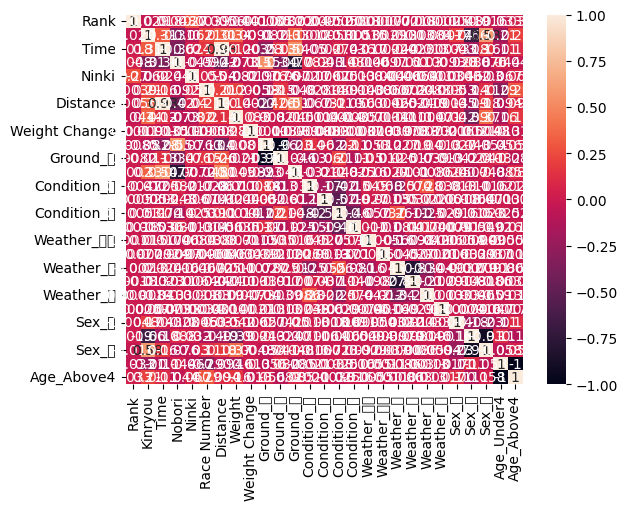

Top 10 Correlations (excluding self-correlations and duplicates):
 Distance  Time        0.982359
Kinryou   Sex_牡       0.579331
Ground_ダ  Nobori      0.546092
Ground_障  Time        0.539393
Distance  Ground_障    0.505214
Sex_牡     Weight      0.371078
Kinryou   Weight      0.338087
Ground_障  Kinryou     0.332169
Distance  Kinryou     0.312394
Kinryou   Time        0.309301
dtype: float64


In [12]:
cor = df1.corr()
sns.heatmap(cor, annot=True)
plt.show()
# 相関係数の上位10を自分自身を除いて追加print
top_10_corr = cor.unstack()
# 自己相関を除外
filtered_corr = top_10_corr[top_10_corr < 1]
# 重複を除外するために、各ペアの小さい方を削除
filtered_corr = filtered_corr[filtered_corr.index.get_level_values(0) < filtered_corr.index.get_level_values(1)]
sorted_pairs = filtered_corr.sort_values(kind="quicksort", ascending=False)
top_10 = sorted_pairs.nlargest(10, 'first')
print("Top 10 Correlations (excluding self-correlations and duplicates):\n", top_10)

